In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
dataset = pd.read_csv('data_lulus_tepat_waktu.csv')

In [3]:
dataset.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [4]:
dataset.shape

(1687, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
ip1      1687 non-null float64
ip2      1687 non-null float64
ip3      1687 non-null float64
ip4      1687 non-null float64
tepat    1687 non-null object
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


In [6]:
dataset.isnull().values.any()

False

In [7]:
ket = {"Ya" : 0, "Tidak" : 1}
dataset["tepat"] = dataset["tepat"].map(ket)

In [8]:
dataset['tepat'].value_counts()

0    1552
1     135
Name: tepat, dtype: int64

In [9]:
print('Ya', round(dataset['tepat'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Tidak', round(dataset['tepat'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Ya 92.0 % of the dataset
Tidak 8.0 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: YA || 1: Tidak)')

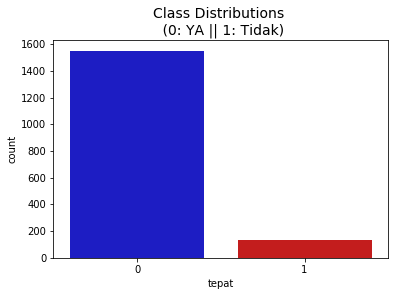

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('tepat', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: YA || 1: Tidak)', fontsize=14)

# Dataset tidak balance, jomplang bet perbedaannya.


kita Resampling datanya. Resampling ada 2 :

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
disini kita menggunakan random over sampling

In [12]:
# Class count
count_class_0, count_class_1 = dataset.tepat.value_counts()

# Divide by class
df_class_0 = dataset[dataset['tepat'] == 0]
df_class_1 = dataset[dataset['tepat'] == 1]

Random over-sampling:
1    1552
0    1552
Name: tepat, dtype: int64


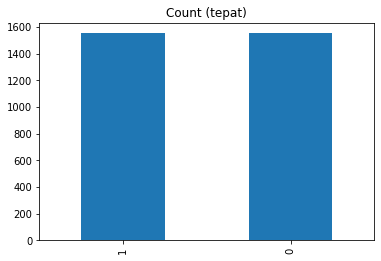

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.tepat.value_counts())

df_test_over.tepat.value_counts().plot(kind='bar', title='Count (tepat)');

gas kan le, kalo udah balance

In [15]:
x = df_test_over.iloc[:, :-1].values
y = df_test_over.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split

validation_size = 0.20
num_trees = 100
seed = 5
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=validation_size, random_state=seed)

In [17]:
#Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
# evaluate each model
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=2, random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring= 'accuracy' )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

C:\Users\balal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\balal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR: 0.657672 (0.000943)
LDA: 0.647601 (0.007794)
KNN: 0.812319 (0.011352)
CART: 0.924283 (0.006474)
NB: 0.617393 (0.012236)
RF: 0.950462 (0.002839)


RF paling besar akurasinya 95%

In [18]:
rf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9774557165861514
[[295  14]
 [  0 312]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       309
           1       0.96      1.00      0.98       312

    accuracy                           0.98       621
   macro avg       0.98      0.98      0.98       621
weighted avg       0.98      0.98      0.98       621



Accuracy nya makin mantul !, kita lanjut kan test

In [19]:
# ip1 = 3.17
# ip2 = 3.02
# ip3 = 3.28
# ip4 = 2.96

prediction_rf=rf.predict([[3.17,3.02,3.28,2.96]])
score1 = rf.score(x_test, y_test)
if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
print("Test score: {0:.2f} %".format(100 * score1)) 

Prediksi : Tidak Tepat Waktu
Test score: 97.75 %


In [20]:
prediction_rf=rf.predict([[3.07,3.04,3.39,3.55]])
score1 = rf.score(x_test, y_test)
if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
print("Test score: {0:.2f} %".format(100 * score1)) 

Prediksi : Tepat Waktu
Test score: 97.75 %
